# Using `hyperSIS`

First, import the package with

In [2]:
import hyperSIS as hs

If necessary, import `matplotlib` and `numpy`:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Using list of edges

The file must contain one edge per line, with the node identifiers separated by spaces. For example:

```txt
1 2
2 3 4 5
1 3 5
6 8 5 9 10 1
```

There are two options:
- `fortran-edgelist`: use this format if the nodes are labeled sequentially from $1$ to $N$, where $N$ is the total number of nodes in the network.
  - Arguments: `("fortran-edgelist", path)`
- `edgelist`: use this format if the node identifiers are arbitrary, e.g., strings or non-sequential integers.
  - Arguments: `("edgelist", path, [delimiter], [comment], [cache])`



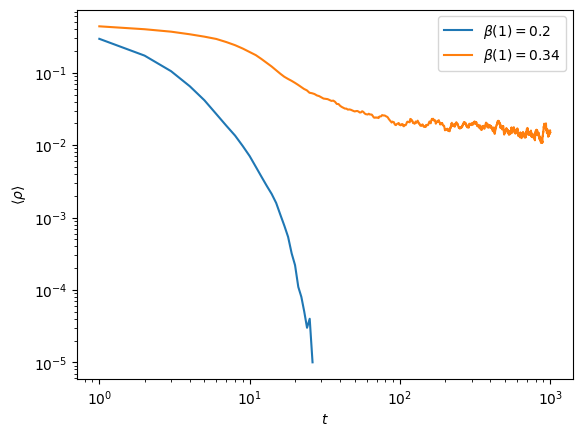

In [3]:
args = hs.SimulationArgs(
    network = ("fortran-edgelist", "data/example.edgelist"),
    #network = ("edgelist", "data/example.edgelist", " ", "#", True),
    tmax = 1000,
    initial_condition = ('fraction', 0.5),
    n_samples = 10,
    par_b = 0.8,
    par_theta = 0.7
)

# Run the simulation for a given value of beta1
fig, ax = plt.subplots()

for beta1 in [0.2, 0.34]:
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get results
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1}$')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\langle \rho \rangle$')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

## Using bipartite format

The file must contain two columns, first is the node id, and second the edge id. For example:

```txt
1 1
2 1
2 2
3 2
4 2
5 2
1 3
3 3
5 3
6 4
8 4
5 4
9 4
10 4
1 4
```

There is one option:
- `bipartite`: use this format if the nodes are labeled sequentially from $1$ to $N$, or arbitrary, e.g., strings or non-sequential integers.
  - Arguments: `("bipartite", path, [delimiter], [comment], [cache])`

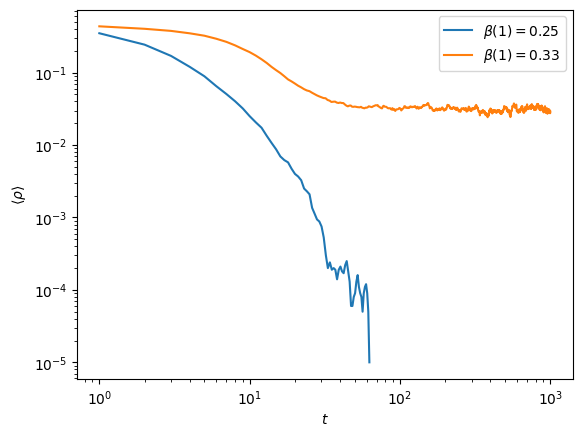

In [4]:
args = hs.SimulationArgs(
    network = ("edgelist", "data/example.bipartite", " ", "#", True),
    tmax = 1000,
    initial_condition = ('fraction', 0.5),
    n_samples = 10,
    par_b = 0.8,
    par_theta = 0.7
)

# Run the simulation for a given value of beta1
fig, ax = plt.subplots()

for beta1 in [0.25, 0.33]:
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get results
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1}$')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\langle \rho \rangle$')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

## Using power-law (PL) synthetic hypergraphs

You can generate pre-defined synthetic hypergraphs with a power-law degree and hyperedge order distribution.

- Arguments: `("PL", gamma, N, [sample])`
  - `gamma`: exponent of the hyperedge order distribution, must be one of `2.5`, `3.0`, or `6.0`.
  - `N`: number of nodes, must be one of `100`, `1000`, `10000`, `100000`, or `1000000`.
  - `sample` (optional): sample index from `1` to `5`. Defaults to `1`.

### Description of the networks

- Number of nodes: `N`  
- Number of hyperedges: `H`  
- Vertex degrees follow a power-law: $P_K \sim K^{-\gamma_k}$ with $\gamma_k = 2.7$  
- Hyperedge orders follow a power-law: $f_m \sim (m+1)^{-\gamma_m}$ with $\gamma_m = 2.5, 3.0, 6.0$  
- A rigid cutoff $K_c$ is imposed for vertex degrees: $N P_{K_c} = 1$  
- For $\gamma_m = 6.0$, hyperedge order cutoff $m_c = 10$; for $\gamma_m = 2.5$ or $3.0$, $H f_{m_c} = 1$  
- Hypergraphs are simple: no self-loops, no repeated hyperedges  
- Vertex indices go from `1` to `N`

Text(0.5, 1.0, 'Initially infected fraction = 0.2')

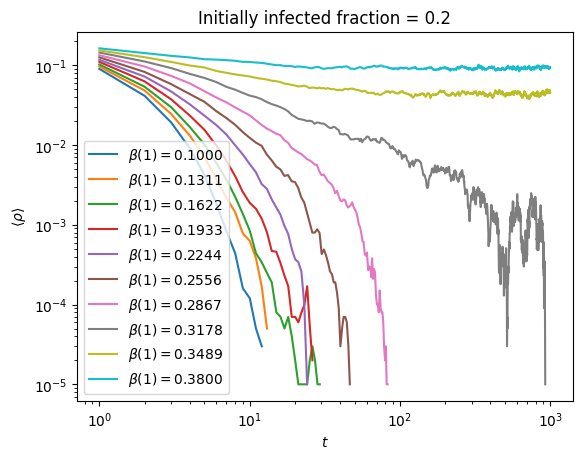

In [5]:
# Small fraction of initially infected nodes

args = hs.SimulationArgs(
    network = ("PL", 3.0, 10000),
    tmax = 1000,
    initial_condition = ('fraction', 0.2),
    n_samples = 10,
    par_b = 0.8,
    par_theta = 0.7
)

# Run the simulation for a given value of beta1
fig, ax = plt.subplots()

for beta1 in np.linspace(0.1, 0.38, 10):
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get results
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\langle \rho \rangle$')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Initially infected fraction = 0.2')

Text(0.5, 1.0, 'Initially infected fraction = 1.0')

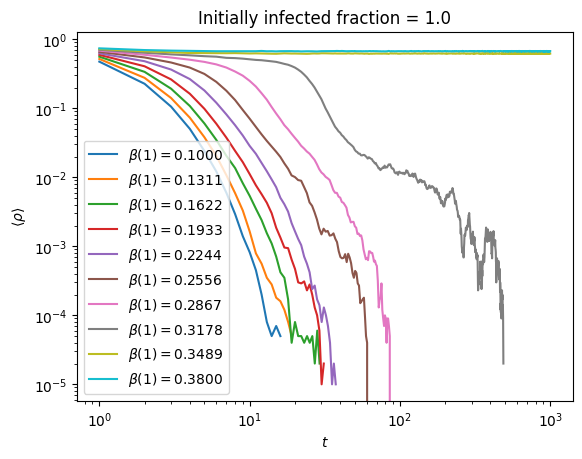

In [6]:
# Whole network initially infected

args = hs.SimulationArgs(
    network = ("PL", 3.0, 10000),
    tmax = 1000,
    initial_condition = ('fraction', 1.0),
    n_samples = 10,
    par_b = 0.8,
    par_theta = 0.7
)

# Run the simulation for a given value of beta1
fig, ax = plt.subplots()

for beta1 in np.linspace(0.1, 0.38, 10):
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get results
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\langle \rho \rangle$')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Initially infected fraction = 1.0')

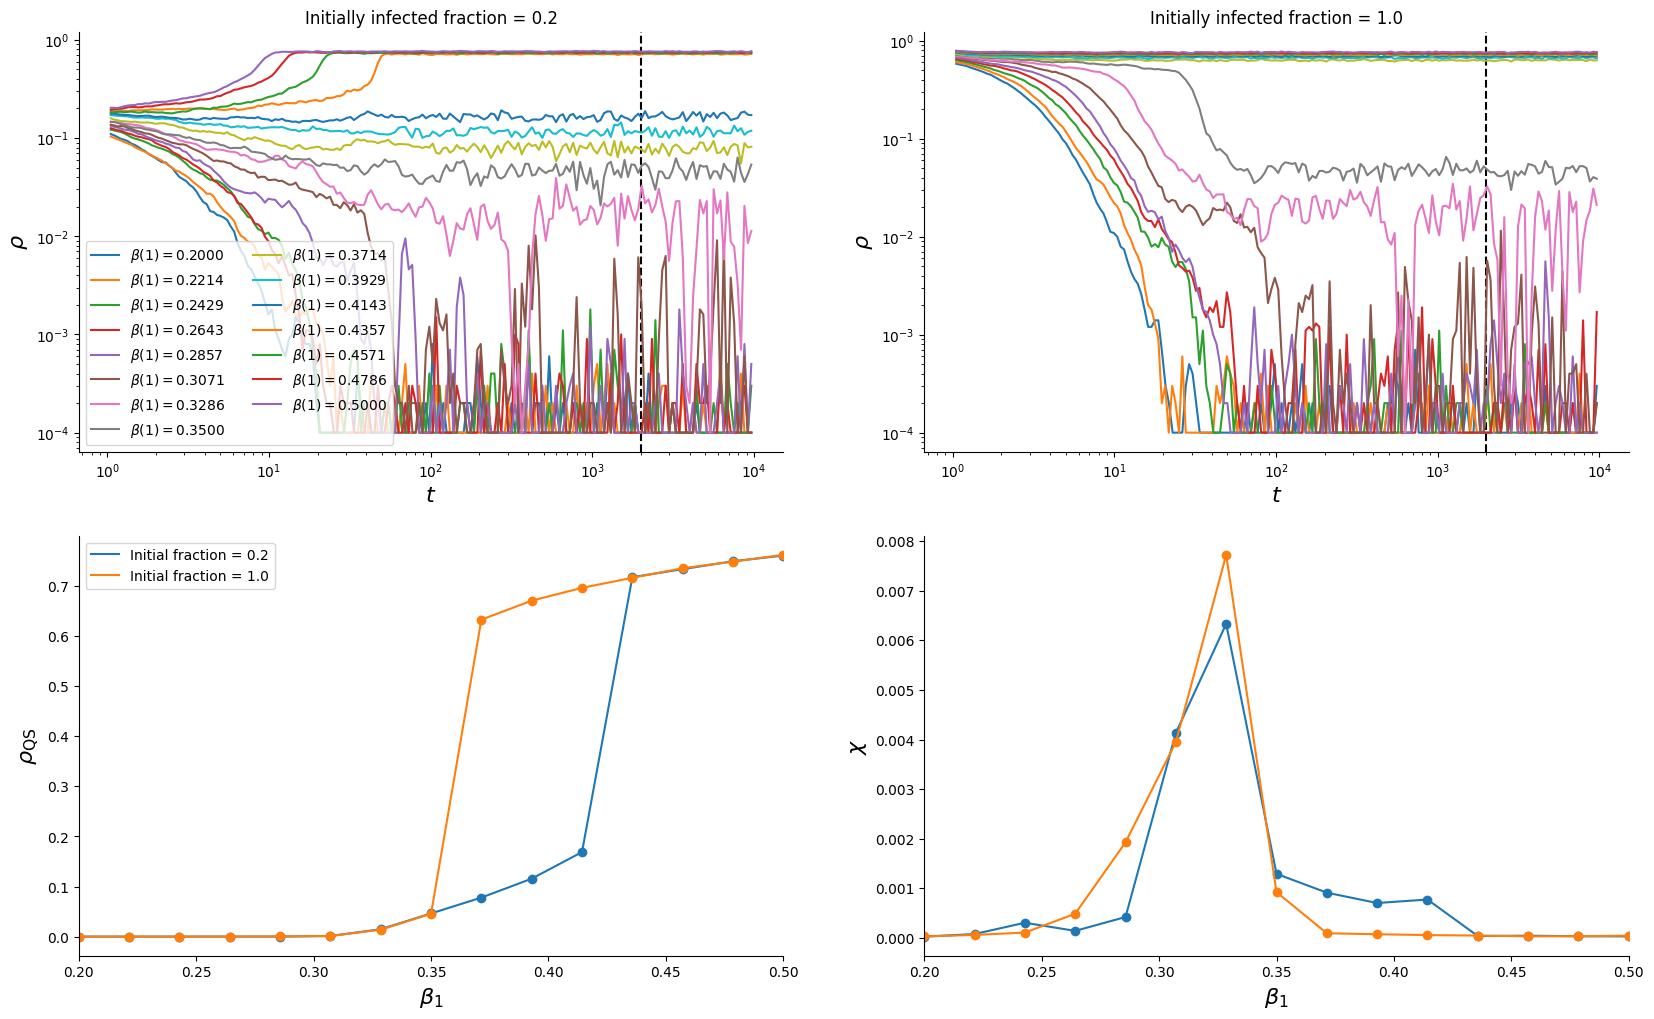

In [3]:
# QS simulation
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

t_rlx = 2000
t_med = 8000

args = hs.SimulationArgs(
    network = ("PL", 3.0, 10000),
    tmax = t_rlx + t_med,
    n_samples = 1,
    par_b = 0.8,
    par_theta = 0.7,
    use_qs = True,
    time_scale = 'powerlaw',
    algorithm = 'NB_OGA'
)

min_beta = 0.20
max_beta = 0.50

beta_values = np.linspace(min_beta, max_beta, 15)

fraction_values = [0.2, 1.0]

# get list of colors of tab20
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Run the simulation for a given value of beta1runs
fig, axs_ori = plt.subplots(ncols=2, nrows=2, figsize=(20,12))
axs = axs_ori.flatten()
sns.despine()

axs[0].axvline(x=t_rlx, color='k', linestyle='--')
axs[1].axvline(x=t_rlx, color='k', linestyle='--')
axs[2].set_xlabel(r'$\beta_1$', fontsize=16)
axs[3].set_xlabel(r'$\beta_1$', fontsize=16)
axs[2].set_ylabel(r'$\rho_\mathrm{QS}$', fontsize=16)
axs[3].set_ylabel(r'$\chi$', fontsize=16)
axs[2].set_xlim(min_beta, max_beta)
axs[3].set_xlim(min_beta, max_beta)

def run_one(beta1, fraction, args):
    # precisa copiar args se ele for mutável internamente
    args.initial_condition = ('fraction', fraction)
    data = hs.run_simulation(beta1=beta1, args=args)

    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    mask = times > t_rlx
    qs_avg = np.mean(rho_avg[mask])
    qs_avg2 = np.mean(rho_avg[mask] ** 2)
    qs_sus = (qs_avg2 - qs_avg**2) / qs_avg

    return beta1, times, rho_avg, qs_avg, qs_sus

for ax_i, fraction in enumerate(fraction_values):
    results = Parallel(n_jobs=-1)(
        delayed(run_one)(beta1, fraction, args) for beta1 in beta_values
    )

    results.sort(key=lambda x: x[0])

    rho_qs = []
    sus_qs = []

    for beta1, times, rho_avg, qs_avg, qs_sus in results:
        rho_qs.append(qs_avg)
        sus_qs.append(qs_sus)

        # Plot temporal
        ax = axs[0 + ax_i]
        ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')
        ax.set_xlabel(r'$t$', fontsize=16)
        ax.set_ylabel(r'$\rho$', fontsize=16)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(f'Initially infected fraction = {fraction}')
        if ax_i == 0:
            ax.legend(loc='lower left', fontsize=10, ncol=2)

        axs[2].plot(beta1, qs_avg, 'o', color=colors[ax_i])
        axs[3].plot(beta1, qs_sus, 'o', color=colors[ax_i])

    axs[2].plot(beta_values, rho_qs, '-', label=f'Initial fraction = {fraction}', color=colors[ax_i])
    axs[2].legend(fontsize=10)

    axs[3].plot(beta_values, sus_qs, '-', label=f'Initial fraction = {fraction}', color=colors[ax_i])

## Using XGI or HIF formats

There are three options for representing general hypergraphs:

- `xgi`: use this format if you have a pre-loaded XGI `Hypergraph` object or a XGI-DATA name.  
  - Arguments: `("xgi", name_or_object, [cache])`  
  - `name_or_object` can be:  
    - a `xgi.classes.Hypergraph` object  
    - a string corresponding to a pre-loaded [XGI-DATA](https://xgi.readthedocs.io/en/stable/xgi-data.html) name  
  - `cache` (optional): if `True`, prepared Fortran files will be cached for future runs.

- `xgi_json`: use this format if you have a hypergraph saved in the XGI JSON format.  
  - Arguments: `("xgi_json", path, [cache])`  
  - `path` is the path to the JSON file.  
  - `cache` (optional): enable caching of Fortran-ready files.

- `hif`: use this format if you have a hypergraph in the [HIF standard](https://github.com/pszufe/HIF-standard) format.  
  - Arguments: `("hif", path, [cache])`  
  - `path` is the path to the HIF file.  
  - `cache` (optional): enable caching of Fortran-ready files.


Text(0.5, 1.0, 'SIS on Hypergraph')

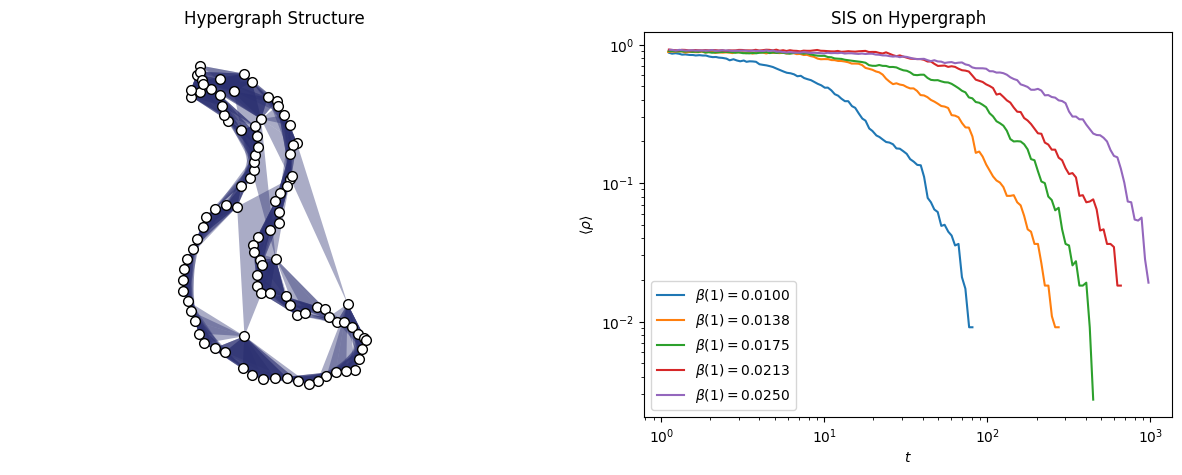

In [7]:
import xgi

# Create a random hypergraph
H = xgi.generators.random.watts_strogatz_hypergraph(100, 4, 6, 2, 0.01)

# Visualize the hypergraph
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

xgi.draw(H, with_edge_labels=True, ax=axs[0])
axs[0].set_title("Hypergraph Structure")

args = hs.SimulationArgs(
    network = ("xgi", H),
    tmax = 1000,
    initial_condition = ('fraction', 1.0),
    n_samples = 100,
    par_b = 0.8,
    par_theta = 0.7,
    sampler = 'btree',
    algorithm = 'NB_OGA',
    time_scale = 'powerlaw'
)

# Run the simulation for a given value of beta1

for beta1 in np.linspace(0.01, 0.025, 5):
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get results
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    axs[1].plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')

axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$\langle \rho \rangle$')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('SIS on Hypergraph')